In [63]:
# Dependencies
import requests
import logging
import pandas as pd

In [64]:
# Define URL parameters
league_id = "564698"
year = ['2023','2022','2021','2020','2019','2018']

In [65]:
swid = "{823B7B7A-5AFC-4B2E-A22A-B2D690D236A8}"
espn_s2 = "AEBMf%2FfmL20PESZFBMdSRkR9HHsxOE%2FvAirc8HkQxtgX9tbG8vsxqa8Qm83LNJam6rJeMAWfmMVt3b2EuNYu7%2FATa0vER%2FTQIfoZRRg4ItNjN8MkU%2FBdNeTsOGei2ZJDgGX3zWxfxkysoQgRaVkikEHDHZtxlY9ZBtk3NrSUE%2BlaTWzbsfsEGlIgNzN4YG4QuUV7GxteDw1hUd%2Fb2sfdvew0ypoKcXrE51OQL5AgdfnH144uN1YmgFd3nNdBe%2FBIadjuJ2TZ7LAzAI7z1P6x7QhiG1Ah7RMTEzO7MDzoLdMODQ%3D%3D"

In [66]:
seasons = []
for yr in year:
    url = "https://lm-api-communication.fantasy.espn.com/apis/v3/games/ffl/seasons/"+yr+"/segments/0/leagues/564698"
    matchup_response = requests.get(url, cookies={"swid": swid,
                          "espn_s2": espn_s2}, headers=headers,params={"view": "mMatchup"})
    matchup_json = matchup_response.json()
    df = [
    [
        game['matchupPeriodId'],
        game['home']['teamId'], 
        game['home'].get('totalPoints', 0),  # Using .get() to handle missing points
        game.get('away', {}).get('teamId', 'N/A'),  # Defaulting to 'N/A' if 'away' key is missing
        game.get('away', {}).get('totalPoints', 0)  # Defaulting to 0 if 'away' key or totalPoints is missing
    ]
    for game in matchup_json['schedule']
    ]
    df = pd.DataFrame(df, columns=['Week', 'HomeTeamId', 'HomeTotalPoints', 'AwayTeamId', 'AwayTotalPoints'])
    df['Type'] = ['Regular' if w<=14 else 'Playoff' for w in df['Week']]
    df['Year'] = yr
    seasons.append(df)

In [67]:
df_sch = pd.concat(seasons)

In [68]:
seasons_tm = []
for yr in year:
    url = "https://lm-api-communication.fantasy.espn.com/apis/v3/games/ffl/seasons/"+yr+"/segments/0/leagues/564698"
    team_response = requests.get(url, cookies={"swid": swid,
                          "espn_s2": espn_s2},params={"view": "forTeamId"}, headers=headers)
    team_json = team_response.json()
    tm = [
    [
        team['abbrev'],
        team['id'],
        team['owners']
    ]
    for team in team_json['teams']
    ]
    
    tm1 = pd.DataFrame(tm, columns=['Abbr', 'TeamID','OwnerID_2'])

    tm = [
    [
        team['displayName'],
        team['id'],
    ]
    for team in team_json['members']
    ]
    
    tm2 = pd.DataFrame(tm, columns=['displayName','OwnerID'])

    # Creating the Cartesian product directly
    dataFrameFull = pd.merge(tm1, tm2, how='cross')

    # Checking if OwnerID_2 is a substring of OwnerID
    dataFrameFull['match'] = dataFrameFull.apply(lambda x: x.OwnerID in x.OwnerID_2, axis=1)
    
    dataFrameFull['Year'] = yr
    seasons_tm.append(dataFrameFull[dataFrameFull['match']])

In [69]:
df_tm = pd.concat(seasons_tm)

In [70]:
seasons_tm_1 = []
for yr in year:
    url = "https://lm-api-communication.fantasy.espn.com/apis/v3/games/ffl/seasons/"+yr+"/segments/0/leagues/564698"
    team_response = requests.get(url, cookies={"swid": swid,
                          "espn_s2": espn_s2},params={"view": "mTeam"}, headers=headers)
    team_json = team_response.json()
    tm = [
    [
        team['displayName'],
        team['firstName'],
        team['lastName'],
        team['id']
    ]
    for team in team_json['members']
    ]
    
    tm1 = pd.DataFrame(tm, columns=['DisplayName', 'First','Last','OwnerID'])
    tm1['Year'] = yr
    seasons_tm_1.append(tm1)

In [71]:
df_tm1 = pd.concat(seasons_tm_1)

In [72]:
df_tm.merge(df_tm1).groupby(['TeamID'])['OwnerID'].nunique()

TeamID
1     1
2     1
3     1
5     1
6     1
7     2
9     3
10    2
11    1
12    3
Name: OwnerID, dtype: int64

In [73]:
teams = df_tm.merge(df_tm1)

In [159]:
#url = 'https://lm-api-communication.fantasy.espn.com/apis/v3/games/ffl/seasons/' + \
#      str(2023) + '/segments/0/leagues/' + str(league_id)

'''r = requests.get(url + '?view=mMatchup&view=mMatchupScore',
                     params={'scoringPeriodId': 1, 'matchupPeriodId': 1},
                     cookies={"SWID": swid, "espn_s2": espn_s2})'''
r = requests.get('https://lm-api-reads.fantasy.espn.com/apis/v3/games/ffl/seasons/2023/segments/0/leagues/564698?scoringPeriodId=17&view=mMatchup&view=mMatchupScore',
                     cookies={"SWID": swid, "espn_s2": espn_s2})
r_json=r.json()

In [161]:
#r_json['teams']

In [127]:
url = 'https://lm-api-communication.fantasy.espn.com/apis/v3/games/ffl/seasons/' + \
      str(season) + '/segments/0/leagues/' + str(league_id)

r = requests.get(url + '?view=mBoxscore&view=mMatchupScore&view=mMatchup',
                     params={'scoringPeriodId': week, 'matchupPeriodId': week},
                     cookies={"SWID": swid, "espn_s2": espn_s2},headers=headers)

In [129]:
#r_json

In [74]:
slotcodes = {
    0 : 'QB', 1 : 'QB',
    2 : 'RB', 3 : 'RB',
    4 : 'WR', 5 : 'WR',
    6 : 'TE', 7 : 'TE',
    16: 'D/ST',
    17: 'K',
    20: 'Bench',
    21: 'IR',
    23: 'Flex'
}

In [240]:
def get_matchups(league_id, season, week, swid='', espn=''):
    ''' 
    Pull full JSON of matchup data from ESPN API for a particular week.
    '''
    
    url = 'https://lm-api-reads.fantasy.espn.com/apis/v3/games/ffl/seasons/'+str(season) + '/segments/0/leagues/' + str(league_id)+'?scoringPeriodId='+str(week)+ '&view=mMatchup&view=mMatchupScore' 

    r = requests.get(url,
                     cookies={"SWID": swid, "espn_s2": espn},headers=headers)
    return r.json()

def get_slates(json,season, week):
    '''
    Constructs week team slates with slotted position, 
    position, and points (actual and ESPN projected),
    given full matchup info (`get_matchups`)
    '''
    
    slates = {}
    slates_ls = []

    for team in d['teams']:
        slate = []
        for p in team['roster']['entries']:
            # get name
            if p.get('playerPoolEntry') and p['playerPoolEntry'].get('player'):
                name = p['playerPoolEntry']['player']['fullName']
            else:
                name = "Unknown Player"

            # get actual lineup slot
            slotid = p['lineupSlotId']
            slot = slotcodes[slotid]

            # get projected and actual scores
            act, proj = 0, 0
            if p.get('playerPoolEntry') and p['playerPoolEntry'].get('player'):
                for stat in p['playerPoolEntry']['player']['stats']:
                    if stat['scoringPeriodId'] != week:
                        continue
                    if stat['statSourceId'] == 0:
                        act = stat['appliedTotal']
                    elif stat['statSourceId'] == 1:
                        proj = stat['appliedTotal']
                    else:
                        print('Error')
            else:
                continue

            # get type of player
            pos = 'Unk'
            if p.get('playerPoolEntry') and p['playerPoolEntry'].get('player'):
                ess = p['playerPoolEntry']['player']['eligibleSlots']
                if 0 in ess: pos = 'QB'
                elif 2 in ess: pos = 'RB'
                elif 4 in ess: pos = 'WR'
                elif 6 in ess: pos = 'TE'
                elif 16 in ess: pos = 'D/ST'
                elif 17 in ess: pos = 'K'
            else:
                continue
            #teamid = team['id']
            
            
            slate.append([name, season, week, slotid, slot, pos, act, proj])

        slate = pd.DataFrame(slate, columns=['Name','Year', 'Week', 'SlotID', 'Slot', 'Pos', 'Actual', 'Proj'])
        #slates_ls.append(slate)
        slates[team['id']] = slate

    return slates

def compute_pts(slates, posns, struc):
    '''
    Given slates (`get_slates`), compute total roster pts:
    actual, optimal, and using ESPN projections
    
    Parameters
    --------------
    slates : `dict` of `DataFrames`
        (from `get_slates`)
    posns : `list`
        roster positions, e.g. ['QB','RB', 'WR', 'TE']
    struc : `list`
        slots per position, e.g. [1,2,2,1]
        
    * This is not flexible enough to handle "weird" leagues
    like 6 Flex slots with constraints on # total RB/WR
    
    Returns
    --------------
    `dict` of `dict`s with actual, ESPN, optimal points
    '''
    
    data = {}
    for tmid, slate in slates.items():
        pts = {'opts': 0, 'epts': 0, 'apts': 0}

        # ACTUAL STARTERS
        pts['apts'] = slate.query('Slot not in ["Bench", "IR"]').filter(['Actual']).sum().values[0]

        # OPTIMAL and ESPNPROJ STARTERS
        for method, cat in [('Actual', 'opts'), ('Proj', 'epts')]:
            actflex = -100  # actual pts scored by flex
            proflex = -100  # "proj" pts scored by flex
            for pos, num in zip(posns, struc):
                # actual points, sorted by either actual or proj outcome
                t = slate.query('Pos == @pos').sort_values(by=method, ascending=False).filter(['Actual']).values[:,0]

                # projected points, sorted by either actual or proj outcome
                t2 = slate.query('Pos == @pos').sort_values(by=method, ascending=False).filter(['Proj']).values[:,0]

                # sum up points
                pts[cat] += t[:num].sum()

                # set the next best as flex
                if pos in ['RB', 'WR', 'TE'] and len(t) > num:
                    fn = t[num] if method=='Actual' else t2[num]
                    if fn > proflex:
                        actflex = t[num]
                        proflex = fn

            pts[cat] += actflex
        
        data[tmid] = pts
        
    return data

#def get_teamnames(league_id, season, week, swid='', espn=''):
    #url = 'https://lm-api-communication.fantasy.espn.com/apis/v3/games/ffl/seasons/' + \
      #str(season) + '/segments/0/leagues/' + str(league_id)
    
    #r = requests.get(url + '?view=mTeam',
                  #params={'scoringPeriodId': week},
                  #cookies={"SWID": swid, "espn_s2": espn})
    #d = r.json()
    
    #tm_names = {tm['id']: tm['location'].strip() + ' ' + tm['nickname'].strip() \
               # for tm in d['teams']}
    
    #return tm_names

In [241]:
def plot_week(d, data, week, tm_names, nummatchups=5, 
              minx=70, maxx=200, legend=4):
    fig, ax = plt.subplots(1,1, figsize=(12,8))

    # hardcoded plot adjustments
    dif, offset = 5, 2
    
    # for y-axis tick labels
    tmlist, tmticks, tmbold = [], [], []

    cury = 0
    for g in d['schedule'][:nummatchups]:
        aid, anm = -1, ''
        hid, hnm = -1, ''
        try:
            aid = g['away']['teamId']
            anm = tm_names[aid]
            hid = g['home']['teamId']
            hnm = tm_names[hid]
        except:
            continue

        tmlist.append(anm)
        tmlist.append(hnm)

        if data[aid]['apts'] > data[hid]['apts']:
            tmbold.extend([1,0])
        else:
            tmbold.extend([0,1])

        for pts in [data[aid], data[hid]]:
            h = 1 if (pts['opts']-offset) > pts['apts'] else 0
            tmticks.append(cury)
            ax.plot([minx, maxx], [cury, cury], 'k--', linewidth=1, alpha=0.1)
            ax.plot([pts['apts'], pts['opts']-offset*h], [cury, cury], 'k-')
            ax.scatter(pts['epts'], cury, c='w', s=200, marker='o', edgecolor='g')
            ax.scatter(pts['apts'], cury, c='k', s=100)

            # if optimal==actual, need to put blue inside black
            if pts['opts'] == pts['apts']:
                ax.scatter(pts['opts'], cury, c='w', s=25)
                ax.scatter(pts['opts'], cury, c='b', s=25, alpha=0.2)
            else:
                ax.scatter(pts['opts'], cury, c='b', s=100, alpha=0.2)

            cury += dif

        cury += 2*dif

    # setting y-axis
    ax.set(yticks=tmticks,
           yticklabels=tmlist)
    for k, tick in enumerate(ax.yaxis.get_major_ticks()):
        if tmbold[k] == 1:
            tick.label1.set_fontweight('bold')

    # legend stuff
    ax.scatter([],[], c='k', s=100, label='Actual')
    ax.scatter([],[], c='w', s=200, marker='o', edgecolor='g', label='ESPN')
    ax.scatter([],[], c='b', s=100, alpha=0.2, label='Best Possible')
    ax.legend(loc=legend, borderaxespad=2, borderpad=1, labelspacing=1.5, 
              shadow=True, fontsize=12)

    ax.set(title='Week %d' % week)

    return ax

In [237]:
def compute_pts(slates, posns, struc):
    '''
    Given slates (`get_slates`), compute total roster points:
    actual, optimal, and using ESPN projections.
    
    Parameters
    --------------
    slates : `dict` of `DataFrames`
        (from `get_slates`)
    posns : `list`
        roster positions, e.g. ['QB', 'RB', 'WR', 'TE']
    struc : `list`
        slots per position, e.g. [1,2,2,1]
        
    * This is not flexible enough to handle "weird" leagues
    like 6 Flex slots with constraints on # total RB/WR
    
    Returns
    --------------
    `dict` of `dict`s with actual, ESPN, and optimal points
    '''
    
    data = {}
    for tmid, slate in slates.items():
        pts = {'opts': 0, 'epts': 0, 'apts': 0}

        # ACTUAL STARTERS
        pts['apts'] = slate.query('Slot not in ["Bench", "IR"]').filter(['Actual']).sum().values[0]

        # OPTIMAL and ESPNPROJ STARTERS
        for method, cat in [('Actual', 'opts'), ('Proj', 'epts')]:
            flex_candidates = []
            for pos, num in zip(posns, struc):
                # actual/projection points, sorted by the respective method
                sorted_slate = slate.query('Pos == @pos').sort_values(by=method, ascending=False)
                
                # Sum up the points for the starters in this position
                pts[cat] += sorted_slate.head(num).filter(['Actual' if method == 'Actual' else 'Proj']).sum().values[0]

                # Add the next best as a flex candidate
                if pos in ['RB', 'WR', 'TE'] and len(sorted_slate) > num:
                    flex_candidates.extend(sorted_slate.iloc[num:].filter(['Actual' if method == 'Actual' else 'Proj']).values[:, 0])
            
            # Add the best flex option to the total
            if flex_candidates:
                pts[cat] += max(flex_candidates)
        
        data[tmid] = pts
        
    return data

In [242]:
league_id = 564698

yr = 2023
week = 2
posns = ['QB', 'RB', 'WR', 'Flex', 'TE', 'D/ST']
struc = [1,2,2,2,1,1]

d      = get_matchups(league_id, yr, week, swid=swid, espn=espn_s2)
slates = get_slates(d, yr, week)
wdata  = compute_pts(slates, posns, struc)
#tms    = get_teamnames(league_id, season, week, swid=swid, espn=espn_s2)

In [243]:
wdata

{1: {'opts': 142.9, 'epts': 131.29999999999998, 'apts': 111.0},
 2: {'opts': 166.39999999999998, 'epts': 137.70000000000002, 'apts': 129.4},
 3: {'opts': 137.6, 'epts': 86.6, 'apts': 107.1},
 5: {'opts': 116.10000000000001, 'epts': 116.10000000000001, 'apts': 118.6},
 6: {'opts': 165.3, 'epts': 115.3, 'apts': 124.2},
 7: {'opts': 151.6, 'epts': 144.4, 'apts': 163.8},
 9: {'opts': 145.10000000000002, 'epts': 145.1, 'apts': 160.1},
 10: {'opts': 123.0, 'epts': 108.10000000000001, 'apts': 109.39999999999999},
 11: {'opts': 140.0, 'epts': 114.9, 'apts': 123.2},
 12: {'opts': 165.0, 'epts': 156.29999999999998, 'apts': 165.3}}

In [234]:
pd.concat(slates).reset_index().rename(columns={'level_0':'TeamID'}).drop(columns=['level_1'])

,TeamID,Name,Year,Week,SlotID,Slot,Pos,Actual,Proj
0,1,Bijan Robinson,2023,2,2,RB,RB,27.1,16.654780
1,1,Garrett Wilson,2023,2,4,WR,WR,17.3,12.896648
2,1,Dameon Pierce,2023,2,2,RB,RB,6.0,15.203412
3,1,Amari Cooper,2023,2,20,Bench,WR,12.5,0.000000
4,1,Alvin Kamara,2023,2,20,Bench,RB,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
158,12,Chase Claypool,2023,2,20,Bench,WR,11.1,4.465399
159,12,Allen Lazard,2023,2,20,Bench,WR,3.3,8.206141
160,12,Steelers D/ST,2023,2,16,D/ST,D/ST,30.0,9.138766
161,12,Dak Prescott,2023,2,20,Bench,QB,26.5,22.108787


In [203]:
league_id = 564698

yrs = [2023,2022,2021,2020,2019,2018]
posns = ['QB', 'RB', 'WR', 'Flex', 'TE', 'D/ST']
struc = [1,2,2,2,1,1,1]

data = {}
slates = {}
ds = {}
print('Week:', end=' ')
for y in yrs:
    data[y] = {}   # Initialize the year-specific dictionary in data
    slates[y] = {} # Initialize the year-specific dictionary in slates
    ds[y] = {}
    for week in range(1,18):
        print(week, y, end=' ')
        d      = get_matchups(league_id, y, week, swid=swid, espn=espn_s2)
        wslate = get_slates(d, y, week)
        wdata  = compute_pts(wslate, posns, struc)
        data[y][week] = wdata
        slates[y][week] = wslate
        ds[y][week] = d

Week: 1 2023 2 2023 3 2023 4 2023 5 2023 6 2023 7 2023 8 2023 9 2023 10 2023 11 2023 12 2023 13 2023 14 2023 15 2023 16 2023 17 2023 1 2022 2 2022 3 2022 4 2022 5 2022 6 2022 7 2022 8 2022 9 2022 10 2022 11 2022 12 2022 13 2022 14 2022 15 2022 16 2022 17 2022 1 2021 2 2021 3 2021 4 2021 5 2021 6 2021 7 2021 8 2021 9 2021 10 2021 11 2021 12 2021 13 2021 14 2021 15 2021 16 2021 17 2021 1 2020 2 2020 3 2020 4 2020 5 2020 6 2020 7 2020 8 2020 9 2020 10 2020 11 2020 12 2020 13 2020 14 2020 15 2020 16 2020 17 2020 1 2019 2 2019 3 2019 4 2019 5 2019 6 2019 7 2019 8 2019 9 2019 10 2019 11 2019 12 2019 13 2019 14 2019 15 2019 16 2019 17 2019 1 2018 2 2018 3 2018 4 2018 5 2018 6 2018 7 2018 8 2018 9 2018 10 2018 11 2018 12 2018 13 2018 14 2018 15 2018 16 2018 17 2018 

In [188]:
#slates

In [189]:
#pd.concat(slates).reset_index().rename(columns={'level_0':'TeamID'}).drop(columns=['level_1'])

In [194]:
#slates

In [204]:
combined_df = pd.DataFrame()

# Iterate through each year, week, and team DataFrame
for year, week_data in slates.items():
    for week, team_data in week_data.items():
        for team_id, df in team_data.items():
            # Add 'Year' and 'TeamID' columns to each DataFrame
            df['Year'] = year
            df['Week'] = week
            df['TeamID'] = team_id
            # Append to the combined DataFrame
            combined_df = pd.concat([combined_df, df], ignore_index=True)

# Optionally, reorder columns if necessary
combined_df

,Name,Year,Week,SlotID,Slot,Pos,Actual,Proj,TeamID
0,Bijan Robinson,2023,1,2,RB,RB,18.3,0.000000,1
1,Garrett Wilson,2023,1,4,WR,WR,11.9,0.000000,1
2,Dameon Pierce,2023,1,2,RB,RB,6.8,0.000000,1
3,Amari Cooper,2023,1,4,WR,WR,5.2,0.000000,1
4,Alvin Kamara,2023,1,20,Bench,RB,0.0,0.000000,1
...,...,...,...,...,...,...,...,...,...
16720,DJ Moore,2018,17,20,Bench,WR,8.5,7.312238,12
16721,Vance McDonald,2018,17,20,Bench,TE,4.2,6.165555,12
16722,Jalen Richard,2018,17,20,Bench,RB,2.3,8.987427,12
16723,Derrick Henry,2018,17,2,RB,RB,12.3,18.547673,12


In [205]:
combined_df.to_csv('alltime_matchups.csv')

In [206]:
combined_df['Year'] = combined_df['Year'].astype(str)

In [208]:
total_matchups = combined_df.merge(teams)

In [229]:
total_matchups.loc[(total_matchups['Year']=="2023")&(total_matchups['Week']==2)&(total_matchups['First']=="Kolby")]

,Name,Year,Week,SlotID,Slot,Pos,Actual,Proj,TeamID,Abbr,OwnerID_2,displayName,OwnerID,match,DisplayName,First,Last
262,Saquon Barkley,2023,2,2,RB,RB,25.9,20.431108,7,MS,[{51A524D8-FAFA-439E-A524-D8FAFA939EE0}],kmodd22,{51A524D8-FAFA-439E-A524-D8FAFA939EE0},True,kmodd22,Kolby,Moddelmog
263,Deebo Samuel,2023,2,4,WR,WR,19.6,13.714873,7,MS,[{51A524D8-FAFA-439E-A524-D8FAFA939EE0}],kmodd22,{51A524D8-FAFA-439E-A524-D8FAFA939EE0},True,kmodd22,Kolby,Moddelmog
264,Terry McLaurin,2023,2,4,WR,WR,13.9,11.989775,7,MS,[{51A524D8-FAFA-439E-A524-D8FAFA939EE0}],kmodd22,{51A524D8-FAFA-439E-A524-D8FAFA939EE0},True,kmodd22,Kolby,Moddelmog
265,DJ Moore,2023,2,23,Flex,WR,19.4,11.147761,7,MS,[{51A524D8-FAFA-439E-A524-D8FAFA939EE0}],kmodd22,{51A524D8-FAFA-439E-A524-D8FAFA939EE0},True,kmodd22,Kolby,Moddelmog
266,Tyler Lockett,2023,2,23,Flex,WR,21.9,11.247250,7,MS,[{51A524D8-FAFA-439E-A524-D8FAFA939EE0}],kmodd22,{51A524D8-FAFA-439E-A524-D8FAFA939EE0},True,kmodd22,Kolby,Moddelmog
267,Josh Jacobs,2023,2,2,RB,RB,8.3,16.836348,7,MS,[{51A524D8-FAFA-439E-A524-D8FAFA939EE0}],kmodd22,{51A524D8-FAFA-439E-A524-D8FAFA939EE0},True,kmodd22,Kolby,Moddelmog
268,Odell Beckham Jr.,2023,2,20,Bench,WR,4.4,8.884116,7,MS,[{51A524D8-FAFA-439E-A524-D8FAFA939EE0}],kmodd22,{51A524D8-FAFA-439E-A524-D8FAFA939EE0},True,kmodd22,Kolby,Moddelmog
269,Kirk Cousins,2023,2,0,QB,QB,45.0,26.280884,7,MS,[{51A524D8-FAFA-439E-A524-D8FAFA939EE0}],kmodd22,{51A524D8-FAFA-439E-A524-D8FAFA939EE0},True,kmodd22,Kolby,Moddelmog
270,Elijah Moore,2023,2,20,Bench,WR,5.7,8.633724,7,MS,[{51A524D8-FAFA-439E-A524-D8FAFA939EE0}],kmodd22,{51A524D8-FAFA-439E-A524-D8FAFA939EE0},True,kmodd22,Kolby,Moddelmog
271,Gabe Davis,2023,2,20,Bench,WR,18.2,10.731870,7,MS,[{51A524D8-FAFA-439E-A524-D8FAFA939EE0}],kmodd22,{51A524D8-FAFA-439E-A524-D8FAFA939EE0},True,kmodd22,Kolby,Moddelmog


In [232]:
# override for blog
tms = {
    1: 'Seth',
    2: 'Jeff',
    3: 'Nick',
    5: 'Micah',
    6: 'Dylan',
    7: 'Kolby',
    9: 'Alex',
    10: 'Anthony',
    11: 'AC',
    12: 'Jacob'
}

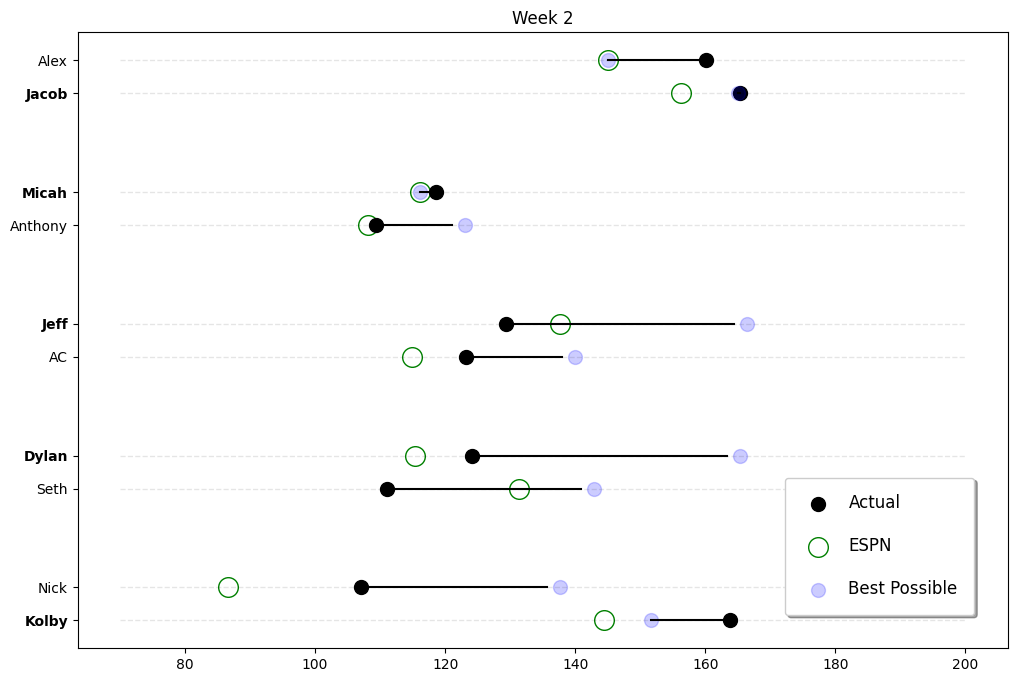

In [233]:
ax = plot_week(d, wdata, week, tms, nummatchups=5)
plt.show()

In [75]:
r

NameError: name 'r' is not defined

In [ ]:
ax = plot_week(d, wdata, week, tms, nummatchups=5)
plt.show()

In [50]:
 tm = [
    [
        team['abbrev'],
        team['id'],
        team['owners']
    ]
    for team in team_json['teams']
    ]
    
tm1 = pd.DataFrame(tm, columns=['Abbr', 'TeamID','OwnerID'])

In [51]:
 tm = [
    [
        team['displayName'],
        team['id'],
    ]
    for team in team_json['members']
    ]
    
tm2 = pd.DataFrame(tm, columns=['displayName','OwnerID_2'])

In [52]:
# Creating the Cartesian product directly
dataFrameFull = pd.merge(tm1, tm2, how='cross')

# Checking if OwnerID_2 is a substring of OwnerID
dataFrameFull['match'] = dataFrameFull.apply(lambda x: x.OwnerID_2 in x.OwnerID, axis=1)


In [54]:
dataFrameFull[dataFrameFull['match']]

,Abbr,TeamID,OwnerID,displayName,OwnerID_2,match
4,SETH,1,[{823B7B7A-5AFC-4B2E-A22A-B2D690D236A8}],base296,{823B7B7A-5AFC-4B2E-A22A-B2D690D236A8},True
17,HEIT,2,[{C5427153-E4B8-4907-8271-53E4B8090793}],JeffHeisman93,{C5427153-E4B8-4907-8271-53E4B8090793},True
32,VGTS,3,[{EDC2966B-560E-4F4A-8296-6B560EAF4A80}],nvogts1,{EDC2966B-560E-4F4A-8296-6B560EAF4A80},True
36,SWAN,5,[{6CF9FBC6-BA1A-4F16-B9FB-C6BA1A3F1659}],MicahSwank13,{6CF9FBC6-BA1A-4F16-B9FB-C6BA1A3F1659},True
44,DYLN,6,[{0A5C7A99-55FE-48FF-9C7A-9955FEC8FF3B}],12gdylan,{0A5C7A99-55FE-48FF-9C7A-9955FEC8FF3B},True
56,MM,7,[{159716FC-F158-49A0-9716-FCF158A9A06B}],41Kolby,{159716FC-F158-49A0-9716-FCF158A9A06B},True
73,Otte,9,"[{DA8634E8-1A57-4C72-8634-E81A575C72D8}, {D91C...",DaboMiller,{D91C2ADF-A3E5-11D2-9B36-00A0C9862BBB},True
74,Otte,9,"[{DA8634E8-1A57-4C72-8634-E81A575C72D8}, {D91C...",Aotte11,{DA8634E8-1A57-4C72-8634-E81A575C72D8},True
79,sc,10,[{5BD59581-6635-4002-B522-DE87802236B8}],sclausing23,{5BD59581-6635-4002-B522-DE87802236B8},True
93,AJC,11,[{84A6667B-5663-4540-A666-7B56637540ED}],aclausing.AC,{84A6667B-5663-4540-A666-7B56637540ED},True


AttributeError: 'list' object has no attribute 'find'

In [47]:
tm1

,Abbr,TeamID,OwnerID
0,SETH,1,[{823B7B7A-5AFC-4B2E-A22A-B2D690D236A8}]
1,HEIT,2,[{C5427153-E4B8-4907-8271-53E4B8090793}]
2,VGTS,3,[{EDC2966B-560E-4F4A-8296-6B560EAF4A80}]
3,SWAN,5,[{6CF9FBC6-BA1A-4F16-B9FB-C6BA1A3F1659}]
4,DYLN,6,[{0A5C7A99-55FE-48FF-9C7A-9955FEC8FF3B}]
5,MM,7,[{159716FC-F158-49A0-9716-FCF158A9A06B}]
6,Otte,9,"[{DA8634E8-1A57-4C72-8634-E81A575C72D8}, {D91C..."
7,sc,10,[{5BD59581-6635-4002-B522-DE87802236B8}]
8,AJC,11,[{84A6667B-5663-4540-A666-7B56637540ED}]
9,DSTN,12,[{E3731A1B-9AF8-4636-BBB8-E64E982D5916}]


In [48]:
tm2

,displayName,OwnerID_2
0,12gdylan,{0A5C7A99-55FE-48FF-9C7A-9955FEC8FF3B}
1,41Kolby,{159716FC-F158-49A0-9716-FCF158A9A06B}
2,sclausing23,{5BD59581-6635-4002-B522-DE87802236B8}
3,MicahSwank13,{6CF9FBC6-BA1A-4F16-B9FB-C6BA1A3F1659}
4,base296,{823B7B7A-5AFC-4B2E-A22A-B2D690D236A8}
5,aclausing.AC,{84A6667B-5663-4540-A666-7B56637540ED}
6,JeffHeisman93,{C5427153-E4B8-4907-8271-53E4B8090793}
7,DaboMiller,{D91C2ADF-A3E5-11D2-9B36-00A0C9862BBB}
8,Aotte11,{DA8634E8-1A57-4C72-8634-E81A575C72D8}
9,dustingeissert10,{E3731A1B-9AF8-4636-BBB8-E64E982D5916}


In [36]:
df_tm

,Abbr,TeamID,OwnerID,Year
0,SETH,1,[{823B7B7A-5AFC-4B2E-A22A-B2D690D236A8}],2023
1,HTZY,2,[{C5427153-E4B8-4907-8271-53E4B8090793}],2023
2,VGTS,3,[{EDC2966B-560E-4F4A-8296-6B560EAF4A80}],2023
3,SWAN,5,[{6CF9FBC6-BA1A-4F16-B9FB-C6BA1A3F1659}],2023
4,DYLN,6,[{0A5C7A99-55FE-48FF-9C7A-9955FEC8FF3B}],2023
5,MS,7,[{51A524D8-FAFA-439E-A524-D8FAFA939EE0}],2023
6,Otte,9,"[{DA8634E8-1A57-4C72-8634-E81A575C72D8}, {03C9...",2023
7,ADO,10,[{5D63E7C9-7E73-45C5-AD19-EA232DB5B145}],2023
8,AC,11,[{84A6667B-5663-4540-A666-7B56637540ED}],2023
9,BERK,12,[{50E2DA25-1B8F-43E5-9641-B60117AAC2D5}],2023


,Abbr,TeamID
0,SETH,1
1,HTZY,2
2,VGTS,3
3,SWAN,5
4,DYLN,6
5,MS,7
6,Otte,9
7,ADO,10
8,AC,11
9,BERK,12


In [18]:
df = [
    [
        game['matchupPeriodId'],
        game['home']['teamId'], 
        game['home'].get('totalPoints', 0),  # Using .get() to handle missing points
        game.get('away', {}).get('teamId', 'N/A'),  # Defaulting to 'N/A' if 'away' key is missing
        game.get('away', {}).get('totalPoints', 0)  # Defaulting to 0 if 'away' key or totalPoints is missing
    ]
    for game in matchup_json['schedule']
]
df = pd.DataFrame(df, columns=['Week', 'HomeTeamId', 'HomeTotalPoints', 'AwayTeamId', 'AwayTotalPoints'])
df['Type'] = ['Regular' if w<=14 else 'Playoff' for w in df['Week']]

In [21]:
df3 = df.assign(MarginH = df['HomeTotalPoints'] - df['AwayTotalPoints'],
                MarginA = df['AwayTotalPoints'] - df['HomeTotalPoints'])
df3_home = df3[['Week','Type', 'HomeTeamId', 'MarginH']].rename(columns={'HomeTeamId': 'Team', 'MarginH': 'Margin'})
df3_away = df3[['Week','Type', 'AwayTeamId', 'MarginA']].rename(columns={'AwayTeamId': 'Team', 'MarginA': 'Margin'})

df3 = pd.concat([df3_home, df3_away]).reset_index()



"df3 = (df3[['Week', 'HomeTeamId', 'MarginH', 'Type']]\n .rename(columns={'HomeTeamId': 'Team', 'MarginH': 'Margin'})\n .append(df3[['Week', 'AwayTeamId', 'MarginA', 'Type']]\n .rename(columns={'AwayTeamId': 'Team', 'MarginA': 'Margin'}))\n        )"

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df3['Team'].unique()

array([3, 6, 2, 5, 9, 1, 10, 12, 11, 7, 'N/A'], dtype=object)

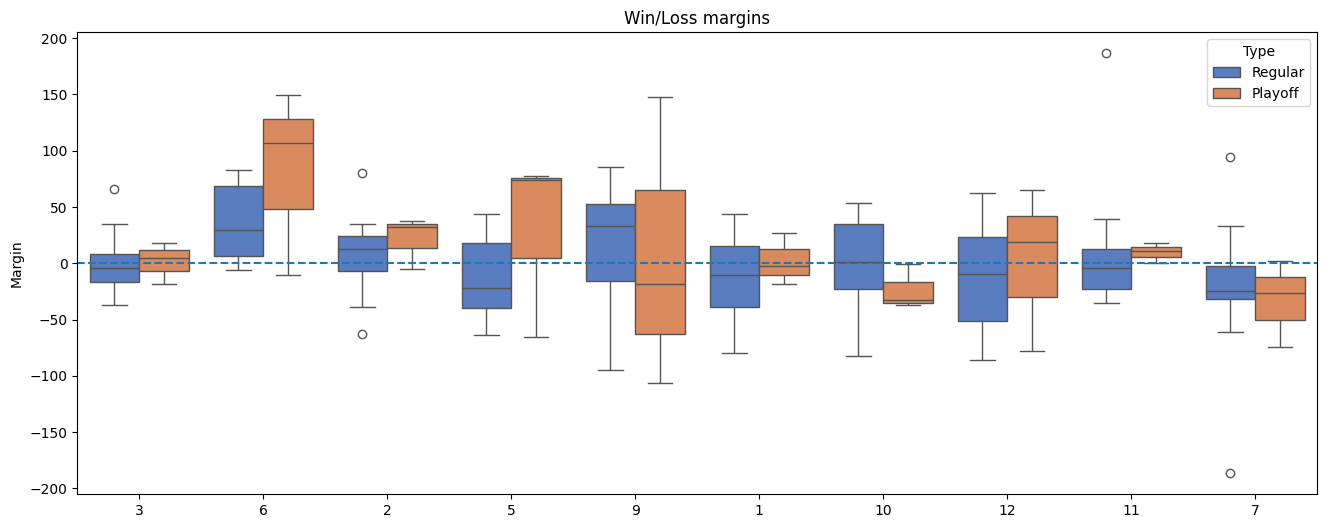

In [27]:
fig, ax = plt.subplots(1,1, figsize=(16,6))
order = [3, 6, 2, 5, 9, 1, 10, 12, 11, 7,]
sns.boxplot(x='Team', y='Margin', hue='Type',
            data=df3,
            palette='muted',
            order=order)
ax.axhline(0, ls='--')
ax.set_xlabel('')
ax.set_title('Win/Loss margins')
plt.show()

In [87]:
#matchup_json

In [85]:
df = [[
        game['matchupPeriodId'],
        game['home']['teamId'], game['home']['totalPoints'],
        game['away']['teamId'], game['away']['totalPoints']
    ] for game in matchup_json['schedule']]
#df = pd.DataFrame(df, columns=['Week', 'Team1', 'Score1', 'Team2', 'Score2'])
#df['Type'] = ['Regular' if w<=14 else 'Playoff' for w in df['Week']]
#df.head()

KeyError: 'away'

In [70]:
matchup_json

{'gameId': 1,
 'id': 564698,
 'members': [{'displayName': 'xanderotte11',
   'id': '{03C9941D-EDA5-4EFC-8994-1DEDA56EFCFE}',
   'isLeagueManager': False},
  {'displayName': '12gdylan',
   'id': '{0A5C7A99-55FE-48FF-9C7A-9955FEC8FF3B}',
   'isLeagueManager': False},
  {'displayName': 'jberkley13',
   'id': '{50E2DA25-1B8F-43E5-9641-B60117AAC2D5}',
   'isLeagueManager': False},
  {'displayName': 'kmodd22',
   'id': '{51A524D8-FAFA-439E-A524-D8FAFA939EE0}',
   'isLeagueManager': False},
  {'displayName': 'ESPNFAN8114445208',
   'id': '{5D63E7C9-7E73-45C5-AD19-EA232DB5B145}',
   'isLeagueManager': False},
  {'displayName': 'MicahSwank13',
   'id': '{6CF9FBC6-BA1A-4F16-B9FB-C6BA1A3F1659}',
   'isLeagueManager': False},
  {'displayName': 'Sethicus Millicus',
   'id': '{823B7B7A-5AFC-4B2E-A22A-B2D690D236A8}',
   'isLeagueManager': False},
  {'displayName': 'aclausing.AC',
   'id': '{84A6667B-5663-4540-A666-7B56637540ED}',
   'isLeagueManager': False},
  {'displayName': 'JeffHeisman93',
   'id

In [56]:
import requests

league_id = 564698
year = 2023
url = "https://fantasy.espn.com/apis/v3/games/ffl/leagueHistory/" + \
      str(league_id) + "?seasonId=" + str(year)

r = requests.get(url)
d = r.json()[0]

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): fantasy.espn.com:443
DEBUG:urllib3.connectionpool:https://fantasy.espn.com:443 "GET /apis/v3/games/ffl/leagueHistory/564698?seasonId=2023 HTTP/1.1" 302 13
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): www.espn.com:443
DEBUG:urllib3.connectionpool:https://www.espn.com:443 "GET /fantasy/ HTTP/1.1" 403 919


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [55]:
try:
    matchup_data = matchup_response.json()
except ValueError:
    print("Response is not valid JSON. Here is the raw response:")
    print(matchup_response.text)

Response is not valid JSON. Here is the raw response:

	<!DOCTYPE html>
	<html class="no-icon-fonts" lang="en">
	<head>
		<meta http-equiv="content-type" content="text/html; charset=UTF-8" />
<meta http-equiv="x-ua-compatible" content="IE=edge,chrome=1" />
<meta name="viewport" content="initial-scale=1.0, maximum-scale=1.0, user-scalable=no">
<meta name="referrer" content="origin-when-cross-origin">
<link rel="canonical" href="https://www.espn.com/fantasy/" />
<title>Fantasy Games</title>
<meta name="description" content="Play ESPN fantasy games. Create or join a fantasy league. Use the ESPN Draft kit, read fantasy blogs, watch video, or listen to ESPN fantasy podcasts." />
<link rel="manifest" href="/manifest.json">
<meta property="fb:app_id" content="116656161708917" />
<meta property="og:site_name" content="ESPN.com" />
<meta property="og:url" content="https://www.espn.com/fantasy/" />
<meta property="og:title" content="Fantasy Games"/>
<meta property="og:description" content="Play 

In [40]:
try:
    matchup_data = matchup_response.json()
except ValueError:
    print("Response is not valid JSON. Here is the raw response:")
    print(matchup_response.text)

Response is not valid JSON. Here is the raw response:

	<!DOCTYPE html>
	<html class="no-icon-fonts" lang="en">
	<head>
		<meta http-equiv="content-type" content="text/html; charset=UTF-8" />
<meta http-equiv="x-ua-compatible" content="IE=edge,chrome=1" />
<meta name="viewport" content="initial-scale=1.0, maximum-scale=1.0, user-scalable=no">
<meta name="referrer" content="origin-when-cross-origin">
<link rel="canonical" href="https://www.espn.com/fantasy/" />
<title>Fantasy Games</title>
<meta name="description" content="Play ESPN fantasy games. Create or join a fantasy league. Use the ESPN Draft kit, read fantasy blogs, watch video, or listen to ESPN fantasy podcasts." />
<link rel="manifest" href="/manifest.json">
<meta property="fb:app_id" content="116656161708917" />
<meta property="og:site_name" content="ESPN.com" />
<meta property="og:url" content="https://www.espn.com/fantasy/" />
<meta property="og:title" content="Fantasy Games"/>
<meta property="og:description" content="Play 

In [4]:
# Transform both of the json outputs into DataFrames
matchup_df = pd.json_normalize(matchup_json[0]['schedule'])

team_df = pd.json_normalize(team_json[0]['teams'])

In [5]:
# Define the column names needed
matchup_column_names = {
    'matchupPeriodId':'Week', 
    'away.teamId':'Team1', 
    'away.totalPoints':'Score1',
    'home.teamId':'Team2', 
    'home.totalPoints':'Score2',
}

team_column_names = {
    'id':'id',
    'location':'Name1',
    'nickname':'Name2'
}

# Reindex based on column names defined above
matchup_df = matchup_df.reindex(columns=matchup_column_names).rename(columns=matchup_column_names)
team_df = team_df.reindex(columns=team_column_names).rename(columns=team_column_names)

In [6]:
# Add a new column for regular/playoff game based on week number
matchup_df['Type'] = ['Regular' if week<=13 else 'Playoff' for week in matchup_df['Week']]

# Concatenate the two name columns
team_df['Name'] = team_df['Name1'] + ' ' + team_df['Name2']

# Drop all columns except id and Name
team_df = team_df.filter(['id', 'Name'])

In [7]:
# (1) Rename Team1 column to id
matchup_df = matchup_df.rename(columns={"Team1":"id"})

# (1) Merge DataFrames to get team names instead of ids and rename Name column to Name1
matchup_df = matchup_df.merge(team_df, on=['id'], how='left')
matchup_df = matchup_df.rename(columns={'Name':'Name1'})

# (1) Drop the id column and reorder columns
matchup_df = matchup_df[['Week', 'Name1', 'Score1', 'Team2', 'Score2', 'Type']]

In [8]:
# (2) Rename Team1 column to id
matchup_df = matchup_df.rename(columns={"Team2":"id"})

# (2) Merge DataFrames to get team names instead of ids and rename Name column to Name2
matchup_df = matchup_df.merge(team_df, on=['id'], how='left')
matchup_df = matchup_df.rename(columns={'Name':'Name2'})

# (2) Drop the id column and reorder columns
matchup_df = matchup_df[['Week', 'Name1', 'Score1', 'Name2', 'Score2', 'Type']]

In [9]:
# Output the DataFrame to a csv
matchup_df.to_csv(f"{year}_matchups.csv")